# Case Study #06 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

### 1. Load the dataset into python environment

In [2]:
dataset = pd.read_csv('W10titanic_dataset.csv')

### 2. Make ‘PassengerId’ as the index column

In [3]:
dataset1 = dataset.set_index('PassengerId')
dataset1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('Number of null values under each column of the dataset:')
print(dataset.isnull().sum())

Number of null values under each column of the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 4. Fill in all the missing values present in all the columns in the dataset

In [6]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset.drop('Cabin', axis=1, inplace=True)
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [7]:
print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 5. Check and handle outliers in at least 3 columns in the dataset

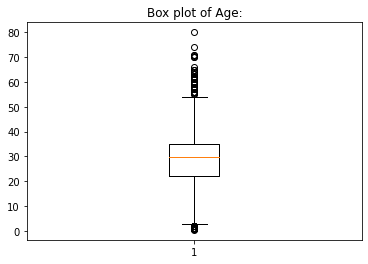

In [8]:
df = dataset
plt.title('Box plot of Age:')
plt.boxplot(dataset['Age'])
Q1 = np.percentile(dataset['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(dataset['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(dataset['Age'], 75, interpolation='midpoint')
IQR = Q3-Q1
lowL = Q1-1.5*IQR
upL = Q3+1.5*IQR
index = dataset[(dataset['Age']<lowL) | (dataset['Age']>upL)].index
dataset.drop(index, inplace=True)

Text(0.5, 1.0, 'Box plot after removing outlier:')

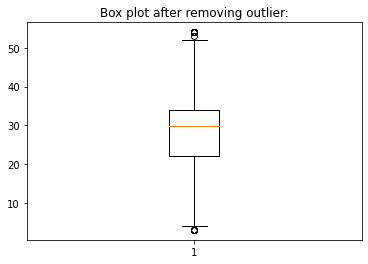

In [9]:
plt.boxplot(dataset['Age'])
plt.title('Box plot after removing outlier:')

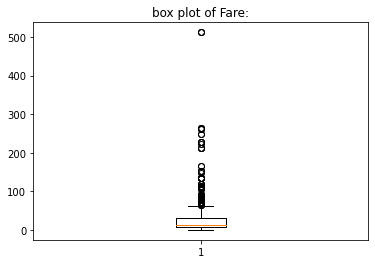

In [10]:
plt.boxplot(dataset['Fare'])
plt.title('box plot of Fare:')
Q1 = np.percentile(dataset['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(dataset['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(dataset['Fare'], 75, interpolation='midpoint')
IQR = Q3-Q1
lowL = Q1-1.5*IQR
upL = Q3+1.5*IQR
ind1 = dataset['Fare']>upL
ind2 = dataset['Fare']<lowL
index = dataset[(dataset['Fare']<lowL) | (dataset['Fare']>upL)].index
dataset.drop(index, inplace=True)

Text(0.5, 1.0, 'Box plot after removing outlier:')

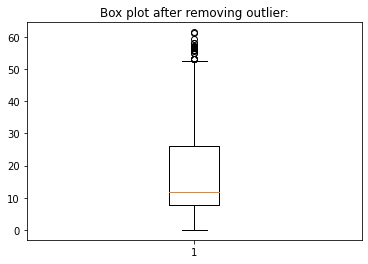

In [11]:
plt.boxplot(dataset['Fare'])
plt.title('Box plot after removing outlier:')

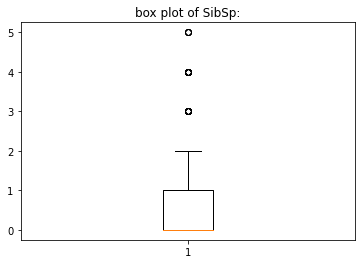

In [12]:
plt.boxplot(dataset['SibSp'])
plt.title('box plot of SibSp:')
Q1 = np.percentile(dataset['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(dataset['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(dataset['SibSp'], 75, interpolation='midpoint')
IQR = Q3-Q1
lowL = Q1-1.5*IQR
upL = Q3+1.5*IQR
ind1 = dataset['SibSp']>upL
ind2 = dataset['SibSp']<lowL
index = dataset[(dataset['SibSp']<lowL) | (dataset['SibSp']>upL)].index
dataset.drop(index, inplace=True)

Text(0.5, 1.0, 'Box plot after removing outlier:')

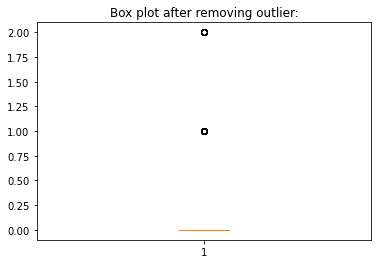

In [13]:
plt.boxplot(dataset['SibSp'])
plt.title('Box plot after removing outlier:')

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,450.661829,0.341074,2.493469,29.100814,0.272859,0.269956,16.631246
std,258.668859,0.474415,0.723586,9.542913,0.501020,0.754625,13.092563
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,223.000000,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,450.000000,0.000000,3.000000,29.699118,0.000000,0.000000,10.500000
75%,674.000000,1.000000,3.000000,33.000000,0.000000,0.000000,23.450000
max,891.000000,1.000000,3.000000,54.000000,2.000000,6.000000,61.379200


In [15]:
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
df = minmax.fit_transform(df)
df = pd.DataFrame

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
df.describe()

TypeError: describe() missing 1 required positional argument: 'self'